In [1]:
from pymodbus.client.sync import ModbusTcpClient


client = ModbusTcpClient('192.168.0.200')
client.write_coil(1, True)
result = client.read_coils(1,1)
print(result.bits[0])
client.close()

ConnectionException: Modbus Error: [Connection] Failed to connect[ModbusTcpClient(192.168.0.200:502)]

In [184]:
import pandas as pd
#data = pd.read_excel(r'D:\Weatherford\Flow Measurements\Research\Modbus_Reg_AFC.xlsx')
data = pd.read_excel(r'\\192.168.0.7\sharedfolder\airflow\dags\Modbus_Reg_AFC.xlsx')

print("Data Loaded OK")
x = data[data['leer']==1][['read','Description','Unit / Remark']]
x

Data Loaded OK


,read,Description,Unit / Remark
0,15,MVT Static Pressure,Bars
1,17,MVT Differential Pressure,Bars
2,19,MVT Temperature,°C
3,21,Sonar Velocity,m/s
4,25,Water Cut,%
17,59,Qg – Standard Conditions,Configurable
18,61,Ql – Standard Conditions,Configurable
19,63,Qo – Standard Conditions,Configurable
20,65,Qw – Standard Conditions,Configurable
29,101,GVF,NaN


In [40]:
x['Description'].values


array(['MVT Static Pressure', 'MVT Differential Pressure',
       'MVT Temperature', 'Sonar Velocity', 'Water Cut',
       'Qg – Standard Conditions', 'Ql  – Standard Conditions',
       'Qo – Standard Conditions', 'Qw – Standard Conditions', 'GVF'],
      dtype=object)

In [134]:
for i in x['read']:
    j = x[x['read']==i]
    print(j['read'].values)

[15]
[17]
[19]
[21]
[25]
[59]
[61]
[63]
[65]
[101]


In [3]:
from pymodbus.constants import Endian
from pymodbus.payload import BinaryPayloadDecoder
from pymodbus.client.sync import ModbusTcpClient

def validator(instance):
    if not instance.isError():
        '''.isError() implemented in pymodbus 1.4.0 and above.'''
        decoder = BinaryPayloadDecoder.fromRegisters(
            instance.registers,
            byteorder=Endian.Big, wordorder=Endian.Little
        )   
        return float('{0:.2f}'.format(decoder.decode_32bit_float()))

    else:
        # Error handling.
        print("There isn't the registers, Try again.")
        return None


client = ModbusTcpClient('192.168.0.200', port=502)  # Specify the port.

connection = client.connect()

if connection:

    for i in x['read']:
        j = x[x['read']==i]
        request = client.read_input_registers((int(j['read'])-2), 2, unit=1)  # Specify the unit.
        data = validator(request)
        print(j['Description'].values,"= ", data , j['Unit / Remark'].values)


        client.close()

else:
        print('Connection lost, Try again')
        



['MVT Static Pressure'] =  93.5 ['Bars']
['MVT Differential Pressure'] =  0.04 ['Bars']
['MVT Temperature'] =  62.88 ['°C']
['Sonar Velocity'] =  6.64 ['m/s']
['Water Cut'] =  63.96 ['%']
['Qg – Standard Conditions'] =  122880.0 ['Configurable']
['Ql  – Standard Conditions'] =  130.29 ['Configurable']
['Qo – Standard Conditions'] =  37.12 ['Configurable']
['Qw – Standard Conditions'] =  93.05 ['Configurable']
['GVF'] =  89.5 [nan]


In [6]:
import psycopg2
from psycopg2 import Error

try:
    # Connect to an existing database
    connection = psycopg2.connect(user="marcosdb",
                                  password="32922161",
                                  host="192.168.0.7",
                                  port="5432",
                                  database="mydb")

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    # Print PostgreSQL details
    print("PostgreSQL server information")
    print(connection.get_dsn_parameters(), "\n")
    # Executing a SQL query
    cursor.execute("SELECT version();")
    # Fetch result
    record = cursor.fetchone()
    print("You are connected to - ", record, "\n")

except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)
finally:
    if (connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")

PostgreSQL server information
{'user': 'marcosdb', 'dbname': 'mydb', 'host': '192.168.0.7', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

You are connected to -  ('PostgreSQL 12.6 (Ubuntu 12.6-0ubuntu0.20.04.1) on x86_64-pc-linux-gnu, compiled by gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0, 64-bit',) 

PostgreSQL connection is closed


In [8]:
import psycopg2

con = psycopg2.connect(database="mydb", user="marcosdb", password="32922161", host="192.168.0.7", port="5432")

print("Database opened successfully")

Database opened successfully


In [9]:
import psycopg2

con = psycopg2.connect(database="mydb", user="marcosdb", password="32922161", host="192.168.0.7", port="5432")
print("Database opened successfully")

cur = con.cursor()

cur.execute("INSERT INTO modbus_data(register, value, description) VALUES (15, 90.7, 'Pressure')");

con.commit()
print("Record inserted successfully")
con.close()

Database opened successfully
Record inserted successfully


In [76]:

from datetime import datetime

# datetime object containing current date and time
now = datetime.now()

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)	

date and time = 21/05/2021 10:14:29


In [182]:
from pymodbus.constants import Endian
from pymodbus.payload import BinaryPayloadDecoder
from pymodbus.client.sync import ModbusTcpClient

from datetime import datetime

def read_time():
    # datetime object containing current date and time
    now = datetime.now()
    # dd/mm/YY H:M:S
    dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
    return dt_string

#database connection
import psycopg2

con = psycopg2.connect(database="mydb", user="marcosdb", password="32922161", host="192.168.0.7", port="5432")


def validator(instance):
    if not instance.isError():
        '''.isError() implemented in pymodbus 1.4.0 and above.'''
        decoder = BinaryPayloadDecoder.fromRegisters(
            instance.registers,
            byteorder=Endian.Big, wordorder=Endian.Little
        )   
        return float('{0:.2f}'.format(decoder.decode_32bit_float()))

    else:
        # Error handling.
        print("There isn't the registers, Try again.")
        return None


client = ModbusTcpClient('192.168.0.200', port=502)  # Specify the port.

connection = client.connect()
var5 = read_time()

if connection:
    
    for i in x['read']:
        j = x[x['read']==i]
        request = client.read_input_registers((int(j['read'])-2), 2, unit=1)  # Specify the unit.
        data = validator(request)
        var1 = int(j['read'])-2
        var2 = j.iloc[0]['Description']
        var3 = data
        var4 = j.iloc[0]['Unit / Remark']
        
        cur = con.cursor()
        cur.execute("INSERT INTO modbus_data(register, description, value, unit, created_on) VALUES (%s, %s, %s, %s, %s)",(var1,var2,var3,var4,var5));
        con.commit()
        print(var2,"= ", data , var4, var5)
        
        client.close()

else:
        print('Connection lost, Try again')
        


print("Record inserted successfully")
con.close()




MVT Static Pressure =  90.0 Bars 21/05/2021 12:03:48
MVT Differential Pressure =  0.03 Bars 21/05/2021 12:03:48
MVT Temperature =  60.73 °C 21/05/2021 12:03:48
Sonar Velocity =  7.66 m/s 21/05/2021 12:03:48
Water Cut =  30.36 % 21/05/2021 12:03:48
Qg – Standard Conditions =  153600.0 Configurable 21/05/2021 12:03:48
Ql  – Standard Conditions =  24.73 Configurable 21/05/2021 12:03:48
Qo – Standard Conditions =  15.21 Configurable 21/05/2021 12:03:48
Qw – Standard Conditions =  9.55 Configurable 21/05/2021 12:03:48
GVF =  98.0 nan 21/05/2021 12:03:48
Record inserted successfully


In [177]:
import psycopg2

con = psycopg2.connect(database="mydb", user="marcosdb", password="32922161", host="192.168.0.7", port="5432")
print("Database opened successfully")

cur = con.cursor()
cur.execute("SELECT register, description, value, unit, created_on from modbus_data")
rows = cur.fetchall()

for row in rows:
    print("Register =", row[0])
    print("Description =", row[1])
    print("value =", row[2])
    print("unit =", row[3])
    print("created_on =", row[4], "\n")

print("Operation done successfully")
con.close()

Database opened successfully
Register = 13
Description = MVT Static Pressure
value = 90.5
unit = Bars
created_on = 2021-05-21 12:00:41 

Register = 15
Description = MVT Differential Pressure
value = 0.03
unit = Bars
created_on = 2021-05-21 12:00:41 

Register = 17
Description = MVT Temperature
value = 60.9
unit = °C
created_on = 2021-05-21 12:00:41 

Register = 19
Description = Sonar Velocity
value = 7.67
unit = m/s
created_on = 2021-05-21 12:00:41 

Register = 23
Description = Water Cut
value = 30.45
unit = %
created_on = 2021-05-21 12:00:41 

Register = 57
Description = Qg – Standard Conditions
value = 153600.0
unit = Configurable
created_on = 2021-05-21 12:00:41 

Register = 59
Description = Ql  – Standard Conditions
value = 24.58
unit = Configurable
created_on = 2021-05-21 12:00:41 

Register = 61
Description = Qo – Standard Conditions
value = 15.63
unit = Configurable
created_on = 2021-05-21 12:00:41 

Register = 63
Description = Qw – Standard Conditions
value = 9.72
unit = Config

In [11]:
import pandas as pd
from sqlalchemy import create_engine
# Postgres username, password, and database name
POSTGRES_ADDRESS = '192.168.0.7' ## INSERT YOUR DB ADDRESS IF IT'S NOT ON PANOPLY
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'marcosdb' ## CHANGE THIS TO YOUR PANOPLY/POSTGRES USERNAME
POSTGRES_PASSWORD = '32922161' ## CHANGE THIS TO YOUR PANOPLY/POSTGRES PASSWORD
POSTGRES_DBNAME = 'mydb' ## CHANGE THIS TO YOUR DATABASE NAME
# A long string that contains the necessary Postgres login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
.format(username=POSTGRES_USERNAME,
password=POSTGRES_PASSWORD,
ipaddress=POSTGRES_ADDRESS,
port=POSTGRES_PORT,
dbname=POSTGRES_DBNAME))
# Create the connection
cnx = create_engine(postgres_str)

df = pd.read_sql_query('''SELECT * FROM modbus_data''', con=cnx)

print(df.columns)

d = df.copy()
d.head()

d1 = pd.pivot_table(d,values=['value'],
                index=['created_on'],
                columns=['description'], aggfunc='first')


#x1.reset_index(level=0, inplace=True)
d1

flattened = pd.DataFrame(d1.to_records())
flattened.columns = [hdr.replace("('value', '", "").replace("')", "") \
                     for hdr in flattened.columns]
flattened

Index(['data_id', 'register', 'description', 'value', 'unit', 'created_on',
       'last_login'],
      dtype='object')


,created_on,GVF,MVT Differential Pressure,MVT Static Pressure,MVT Temperature,Qg – Standard Conditions,Ql – Standard Conditions,Qo – Standard Conditions,Qw – Standard Conditions,Sonar Velocity,Water Cut
0,2021-05-22 17:11:19,92.0,NaN,NaN,NaN,112128.0,80.21,48.39,26.37,NaN,32.98
1,2021-05-22 17:11:40,98.5,0.0,90.5,58.63,184320.0,24.14,15.4,8.92,8.9,29.72
2,2021-05-22 17:11:42,88.0,0.05,91.0,58.93,183296.0,23.86,0.0,90.11,9.04,28.67
3,2021-05-22 17:11:51,89.0,0.13,94.0,0.0,122880.0,138.43,41.57,94.24,6.69,61.67
4,2021-05-22 17:13:20,NaN,0.0,94.0,67.77,107520.0,65.06,35.19,28.77,12.19,78.57
...,...,...,...,...,...,...,...,...,...,...,...
203,2021-05-22 17:31:54,93.5,0.02,90.0,59.14,0.0,76.53,52.72,25.64,5.42,0.0
204,2021-05-22 17:31:55,94.0,0.04,3008.0,61.5,136192.0,76.33,50.56,24.42,7.05,26.23
205,2021-05-22 17:31:56,93.5,0.03,90.5,61.2,139264.0,72.19,48.92,25.51,7.13,26.32
206,2021-05-22 17:31:57,NaN,0.04,90.0,61.25,138240.0,61.17,40.65,25.83,7.12,26.45


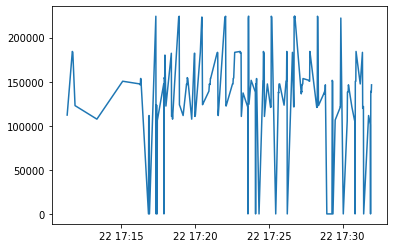

In [12]:
import matplotlib.pyplot as plt
import numpy as np
y = flattened['Qg – Standard Conditions'].astype(float)
plt.plot(flattened['created_on'],y)

In [176]:
x1 = pd.pivot_table(x,values=['value'],
                index=['created_on'],
                columns=['description'], aggfunc='first')


#x1.reset_index(level=0, inplace=True)
x1

flattened = pd.DataFrame(x1.to_records())
flattened.columns = [hdr.replace("('value', '", "").replace("')", "") \
                     for hdr in flattened.columns]
flattened

#x.groupby('created_on')['description','value'].first()

,created_on,GVF,MVT Differential Pressure,MVT Static Pressure,MVT Temperature,Qg – Standard Conditions,Ql – Standard Conditions,Qo – Standard Conditions,Qw – Standard Conditions,Sonar Velocity,Water Cut
0,2021-05-21 12:00:41,98.0,0.03,90.5,60.9,153600.0,24.58,15.63,9.72,7.67,30.45
1,2021-05-21 12:00:45,NaN,0.05,90.5,59.02,183296.0,23.86,15.35,0.0,9.0,28.71


In [4]:
import sched, time
from pymodbus.constants import Endian
from pymodbus.payload import BinaryPayloadDecoder
from pymodbus.client.sync import ModbusTcpClient

def validator(instance):
    if not instance.isError():
        '''.isError() implemented in pymodbus 1.4.0 and above.'''
        decoder = BinaryPayloadDecoder.fromRegisters(
            instance.registers,
            byteorder=Endian.Big, wordorder=Endian.Little
        )   
        return float('{0:.2f}'.format(decoder.decode_32bit_float()))

    else:
        # Error handling.
        print("There isn't the registers, Try again.")
        return None


client = ModbusTcpClient('192.168.0.200', port=502)  # Specify the port.

s = sched.scheduler(time.time, time.sleep)


def do_something(sc): 
    connection = client.connect()

    if connection:

        for i in x['read']:
            j = x[x['read']==i]
            request = client.read_input_registers((int(j['read'])-2), 2, unit=1)  # Specify the unit.
            data = validator(request)
            print(j['Description'].values,"= ", data , j['Unit / Remark'].values)


            client.close()

    else:
            print('Connection lost, Try again')
    # do your stuff
    s.enter(5, 1, do_something, (sc,))

s.enter(5, 1, do_something, (s,))
s.run()



['MVT Static Pressure'] =  91.0 ['Bars']
['MVT Differential Pressure'] =  0.04 ['Bars']
['MVT Temperature'] =  60.62 ['°C']
['Sonar Velocity'] =  7.59 ['m/s']
['Water Cut'] =  30.24 ['%']
['Qg – Standard Conditions'] =  150528.0 ['Configurable']
['Ql  – Standard Conditions'] =  61.18 ['Configurable']
['Qo – Standard Conditions'] =  37.76 ['Configurable']
['Qw – Standard Conditions'] =  23.25 ['Configurable']
['GVF'] =  95.0 [nan]
['MVT Static Pressure'] =  91.0 ['Bars']
['MVT Differential Pressure'] =  0.02 ['Bars']
['MVT Temperature'] =  58.1 ['°C']
['Sonar Velocity'] =  5.64 ['m/s']
['Water Cut'] =  27.25 ['%']
['Qg – Standard Conditions'] =  110592.0 ['Configurable']
['Ql  – Standard Conditions'] =  80.21 ['Configurable']
['Qo – Standard Conditions'] =  52.43 ['Configurable']
['Qw – Standard Conditions'] =  28.02 ['Configurable']
['GVF'] =  91.5 [nan]
['MVT Static Pressure'] =  90.0 ['Bars']
['MVT Differential Pressure'] =  0.02 ['Bars']
['MVT Temperature'] =  59.31 ['°C']
['Sonar V

KeyboardInterrupt: 